# Advanced DA assignment



**Assignment Overview**

In this assignment, we will examine a dataset to address issues related to outliers, skewness, imbalance, and feature engineering.

**About the Data**

**Dataset Context**  
The New York City (NYC) Taxi & Limousine Commission (TLC) collects and maintains data on all NYC cabs, which is available for public download from its official website. The TLC oversees data for four main types of vehicles:

1. **Yellow Taxi (Yellow Medallion Taxicabs):**  
   These iconic NYC yellow taxis provide transportation exclusively through street hails. The number of taxicabs is controlled by a limited number of medallions issued by the TLC. You can access this mode of transportation by hailing an available taxi directly from the street. Pickups are not pre-arranged.

2. **Green Taxi (Street Hail Livery, SHL):**  
   The SHL program allows livery vehicle owners to license and outfit their vehicles with green borough taxi branding, meters, credit card machines, and permission to accept street hails in addition to pre-arranged rides.

3. **For-Hire Vehicles (FHVs):**  
   FHV transportation requires a pre-arranged booking with a dispatcher or limo company. FHVs are not allowed to pick up passengers via street hails, as these rides are considered non-pre-arranged.


In [2]:
# try download data using
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elemento/nyc-yellow-taxi-trip-data")

print("Path to dataset files:", path)

# reference: https://www.kaggle.com/datasets/elemento/nyc-yellow-taxi-trip-data

100%|██████████| 1.78G/1.78G [00:23<00:00, 80.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/elemento/nyc-yellow-taxi-trip-data/versions/2


In [3]:
# Display the names of the files in the path
import os
file_path = "/root/.cache/kagglehub/datasets/elemento/nyc-yellow-taxi-trip-data/versions/2"

files = os.listdir(file_path)
files

['yellow_tripdata_2016-03.csv',
 'yellow_tripdata_2015-01.csv',
 'yellow_tripdata_2016-02.csv',
 'yellow_tripdata_2016-01.csv']

In [4]:
# read data
import pandas as pd

# Specify the path to the files
file_path = "/root/.cache/kagglehub/datasets/elemento/nyc-yellow-taxi-trip-data/versions/2"

# Read the CSV file
data = pd.read_csv(f"{file_path}/yellow_tripdata_2016-03.csv")

data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


In [8]:
# make a basic overview on the data as info, columns, describe, etc

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12210952 entries, 0 to 12210951
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        int64  
 4   trip_distance          float64
 5   pickup_longitude       float64
 6   pickup_latitude        float64
 7   RatecodeID             int64  
 8   store_and_fwd_flag     object 
 9   dropoff_longitude      float64
 10  dropoff_latitude       float64
 11  payment_type           int64  
 12  fare_amount            float64
 13  extra                  float64
 14  mta_tax                float64
 15  tip_amount             float64
 16  tolls_amount           float64
 17  improvement_surcharge  float64
 18  total_amount           float64
dtypes: float64(12), int64(4), object(3)
memory usage: 1.7+ GB


In [9]:
data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')

In [10]:
data.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07
mean,1.530647e+00,1.659580e+00,6.131770e+00,-7.287133e+01,4.014349e+01,1.040395e+00,-7.293679e+01,4.018050e+01,1.340920e+00,1.279508e+01,3.455600e-01,4.976363e-01,1.792582e+00,3.152554e-01,2.997199e-01,1.604582e+01
std,4.990599e-01,1.312189e+00,6.156483e+03,8.964108e+00,4.937996e+00,5.807342e-01,8.696974e+00,4.790940e+00,4.902621e-01,1.340979e+02,4.563069e-01,4.863319e-02,2.549124e+00,1.751526e+00,1.230647e-02,1.343578e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,-1.616987e+02,0.000000e+00,1.000000e+00,-1.616987e+02,0.000000e+00,1.000000e+00,-3.760000e+02,-5.850000e+01,-1.000000e+00,-2.000000e+01,-1.604000e+01,-3.000000e-01,-3.763000e+02
25%,1.000000e+00,1.000000e+00,1.000000e+00,-7.399174e+01,4.073630e+01,1.000000e+00,-7.399125e+01,4.073462e+01,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.750000e+00
50%,2.000000e+00,1.000000e+00,1.700000e+00,-7.398161e+01,4.075325e+01,1.000000e+00,-7.397961e+01,4.075375e+01,1.000000e+00,9.500000e+00,0.000000e+00,5.000000e-01,1.350000e+00,0.000000e+00,3.000000e-01,1.180000e+01
75%,2.000000e+00,2.000000e+00,3.180000e+00,-7.396678e+01,4.076765e+01,1.000000e+00,-7.396228e+01,4.076910e+01,2.000000e+00,1.450000e+01,5.000000e-01,5.000000e-01,2.360000e+00,0.000000e+00,3.000000e-01,1.776000e+01
max,2.000000e+00,9.000000e+00,1.907263e+07,0.000000e+00,6.685682e+01,9.900000e+01,0.000000e+00,5.079786e+01,4.000000e+00,4.294967e+05,8.000000e+01,7.930000e+01,8.500000e+02,1.410320e+03,3.000000e-01,4.295622e+05


In [11]:
# Check for missing values ​​in columns
data.isnull().sum()

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
pickup_longitude,0
pickup_latitude,0
RatecodeID,0
store_and_fwd_flag,0
dropoff_longitude,0


In [12]:
# Display the first 10 rows of data
data.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80
5,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,5.92,-74.017197,40.705383,1,N,-73.978073,40.755787,1,23.5,1.0,0.5,5.06,0.00,0.3,30.36
6,2,2016-03-01 00:00:00,2016-03-01 00:00:00,6,5.72,-73.994583,40.727848,1,N,0.000000,0.000000,2,23.0,0.5,0.5,0.00,0.00,0.3,24.30
7,1,2016-03-01 00:00:01,2016-03-01 00:16:04,1,6.20,-73.788773,40.647758,1,N,-73.829208,40.712345,3,20.5,0.5,0.5,0.00,0.00,0.3,21.80
8,1,2016-03-01 00:00:01,2016-03-01 00:05:00,1,0.70,-73.958221,40.764641,1,N,-73.967896,40.762901,1,5.5,0.5,0.5,2.00,0.00,0.3,8.80
9,2,2016-03-01 00:00:01,2016-03-01 00:24:06,3,7.18,-73.985779,40.741192,1,N,-73.946350,40.797878,1,23.5,0.5,0.5,3.20,0.00,0.3,28.00


## Task 1
- For the numeric columns, check the distribution.
- what you find?
- what the issues here then?
- assume approches to solve them and apply

**note** : from the distribution you should get the skew, bias and outlier handle eachone for each column

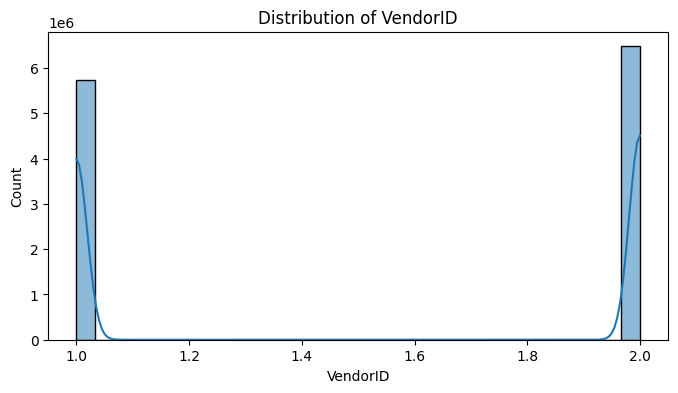

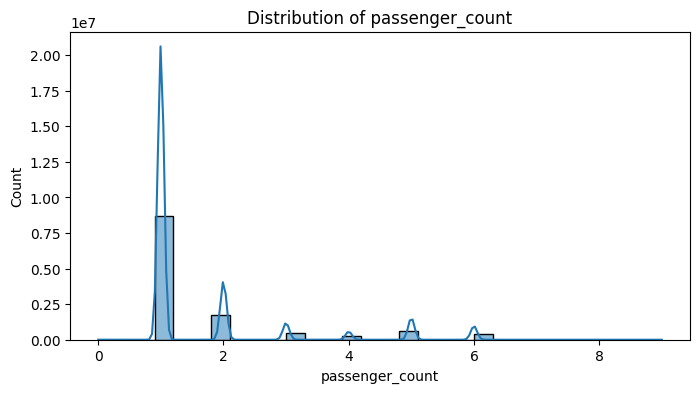

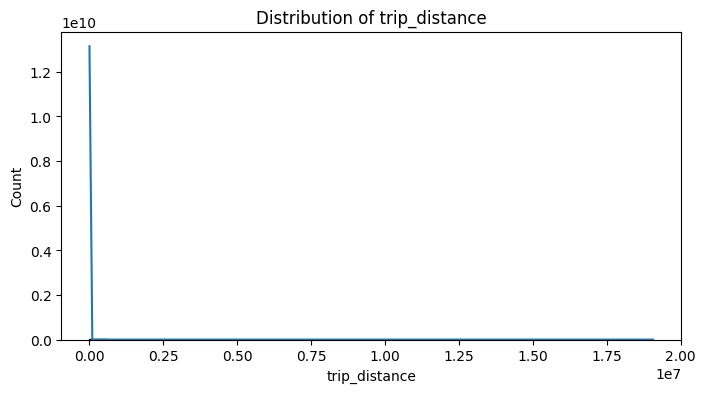

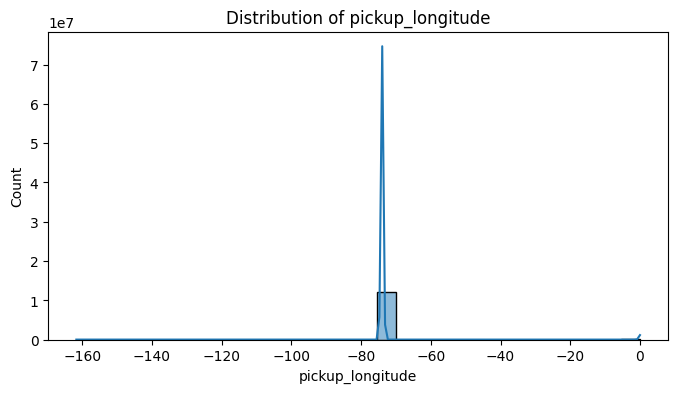

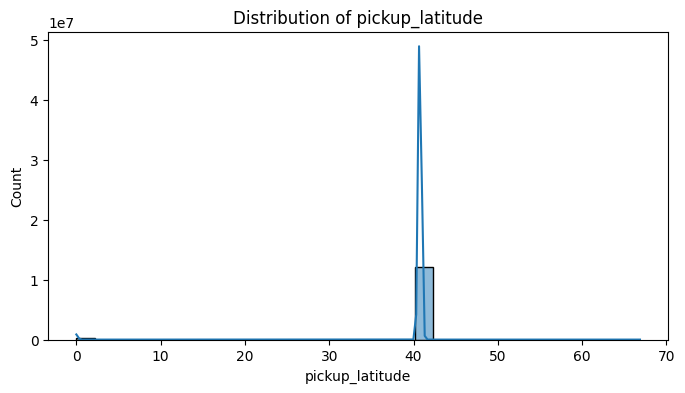

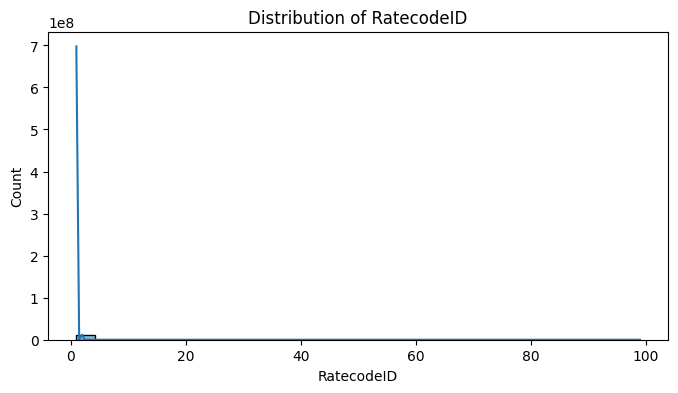

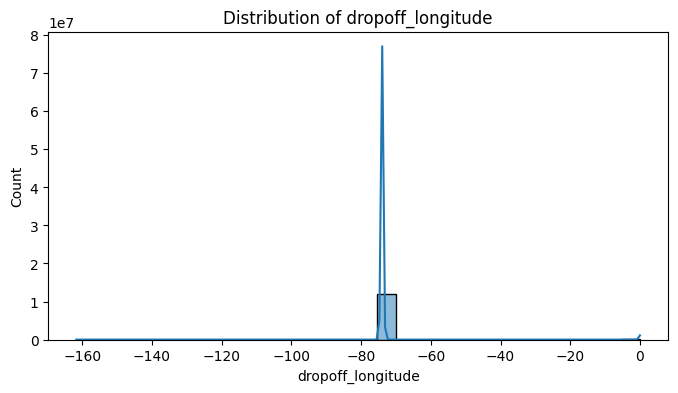

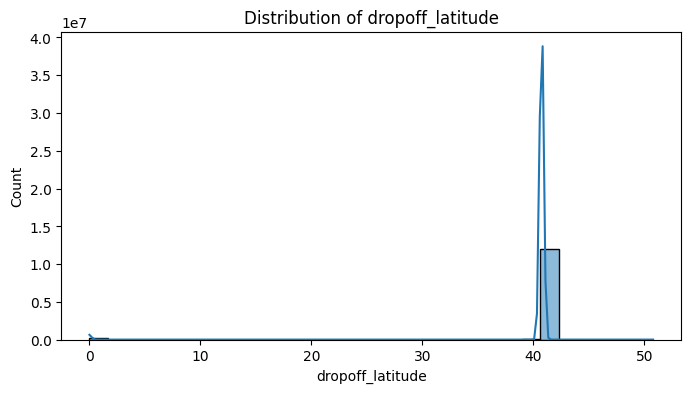

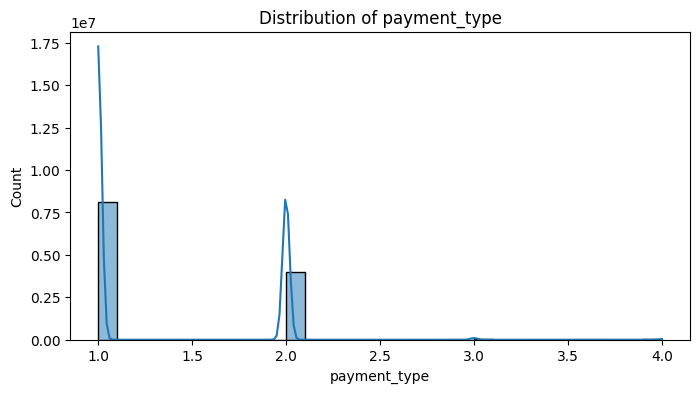

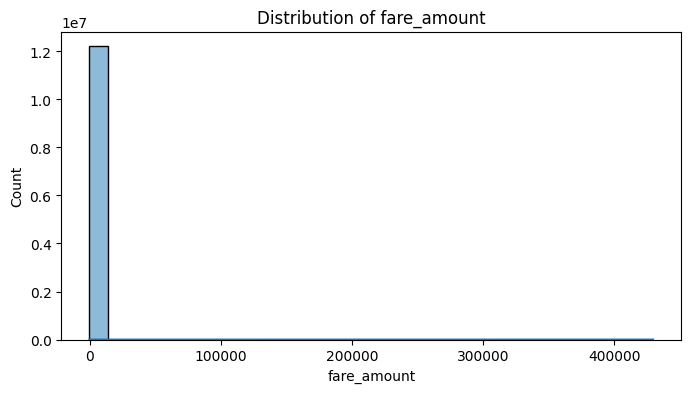

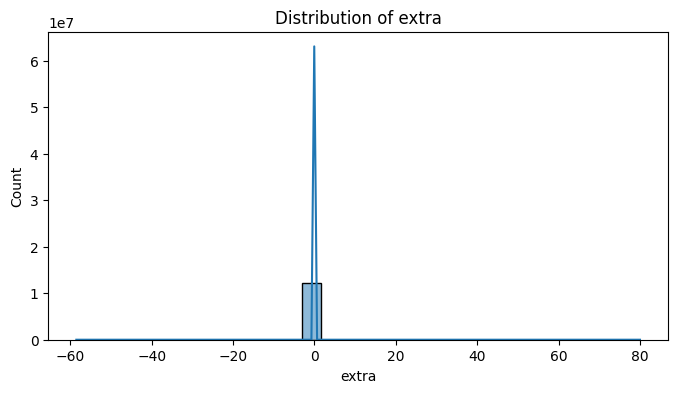

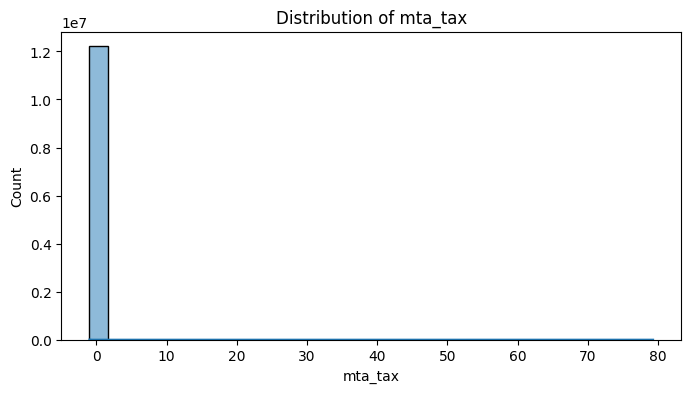

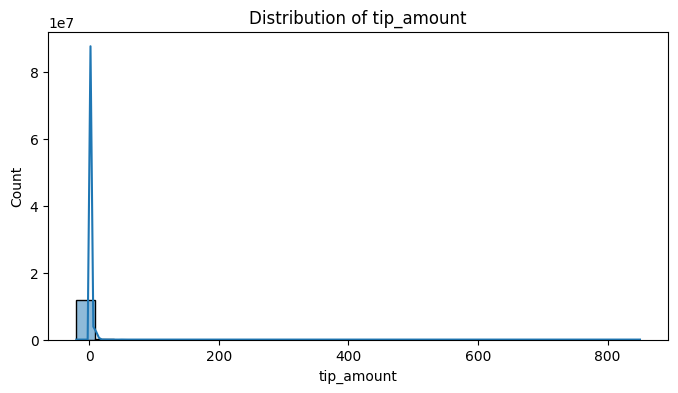

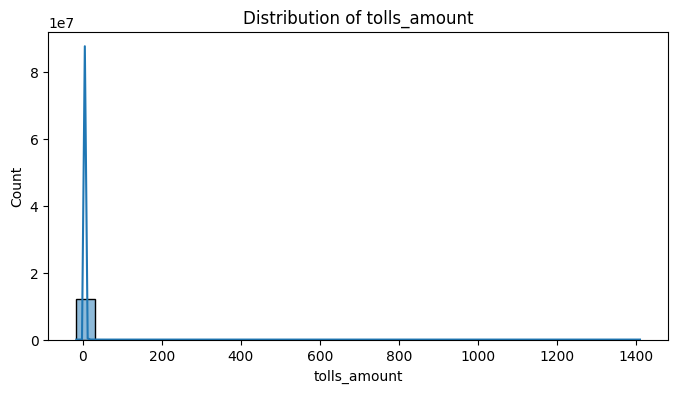

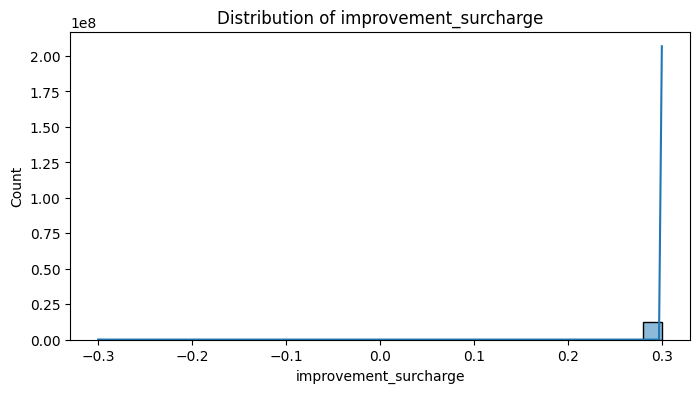

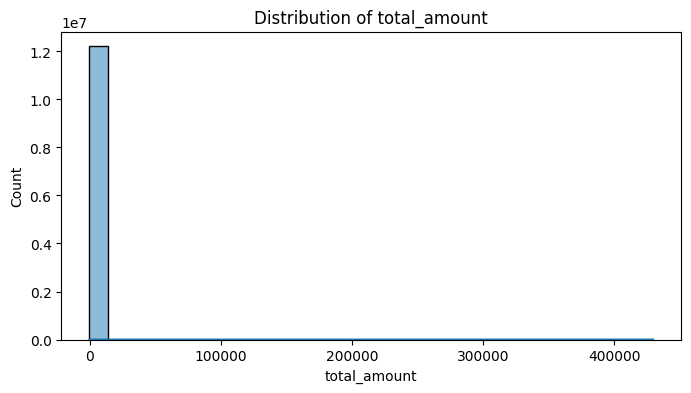

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()


Analysis:

Normal distribution: It has a symmetrical bell shape.

Skewed distribution: If it is skewed right or left.



________________________________________________________________________________

**Boxplot**

Seeing outliers

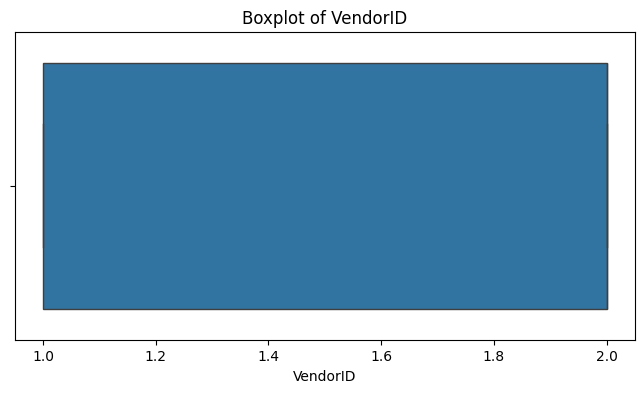

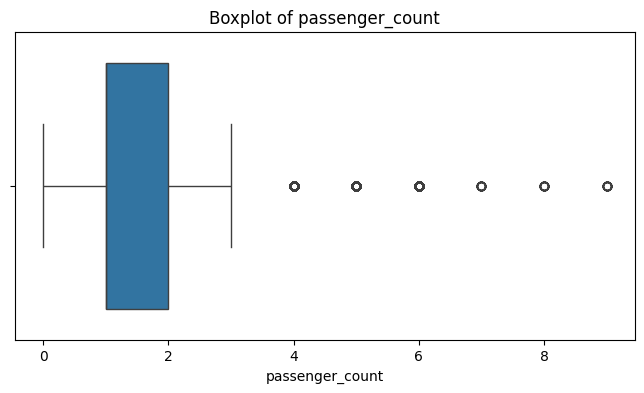

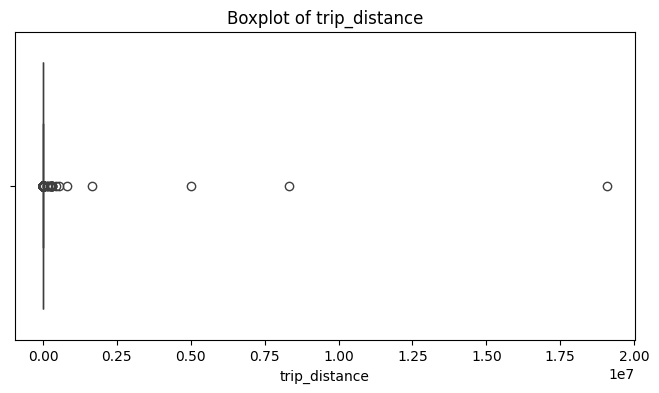

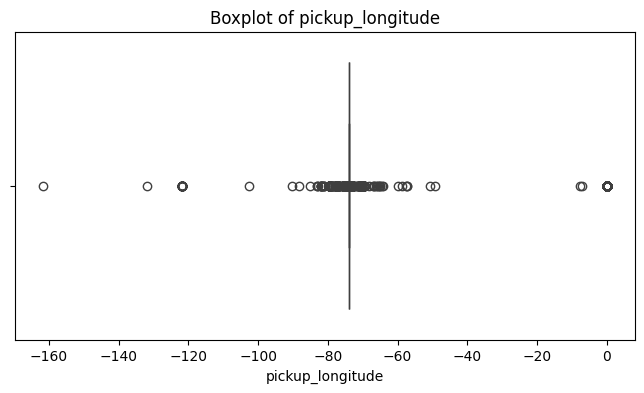

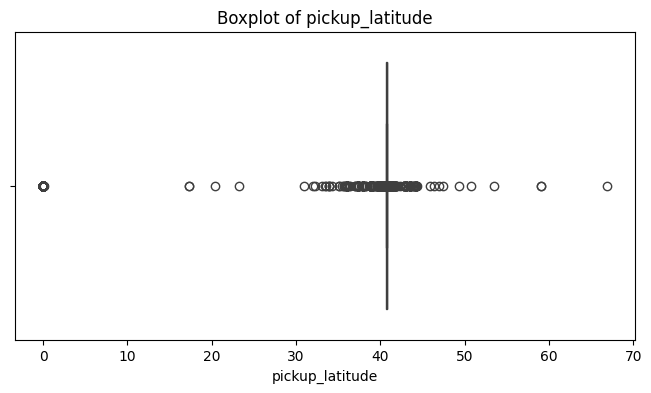

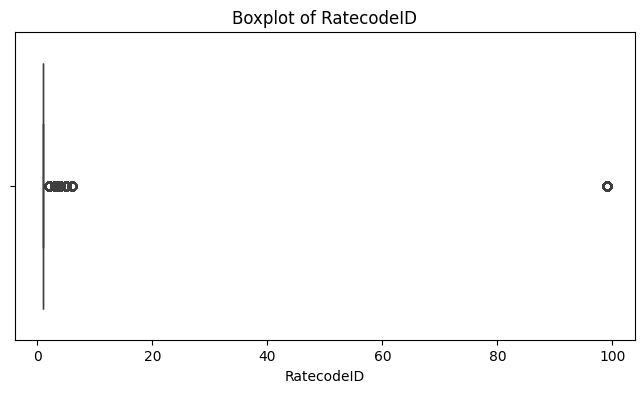

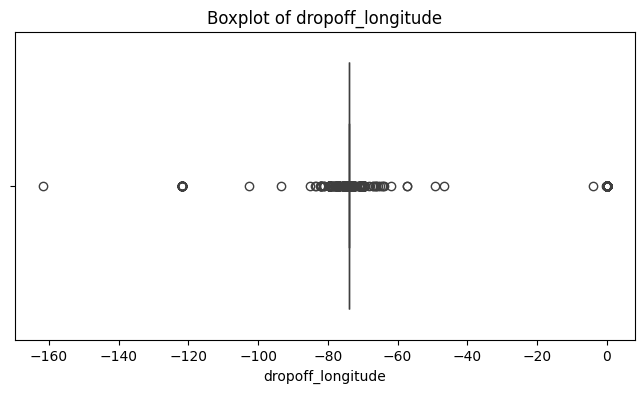

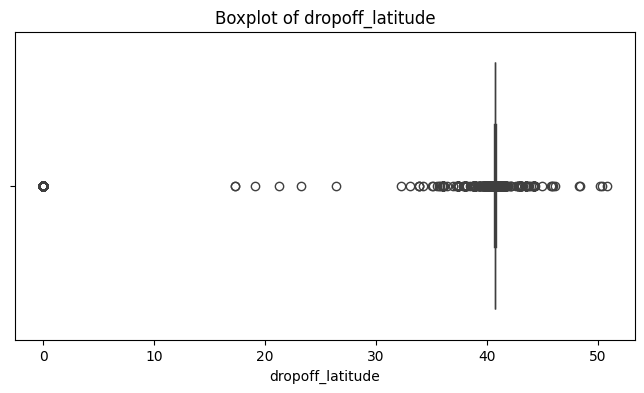

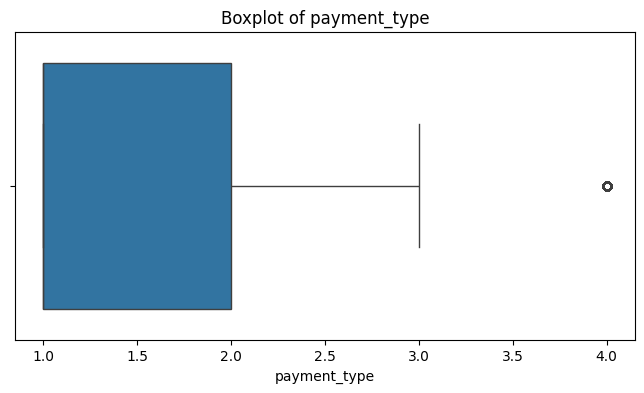

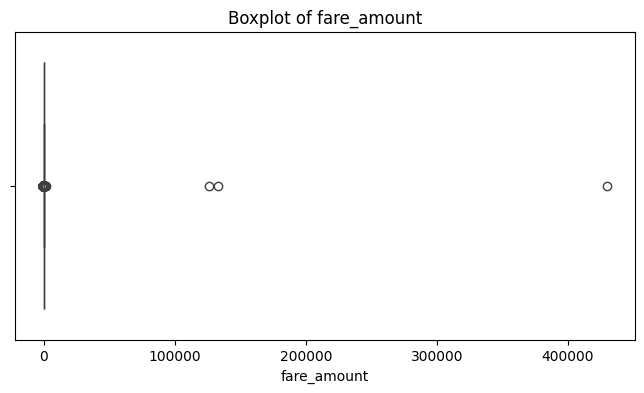

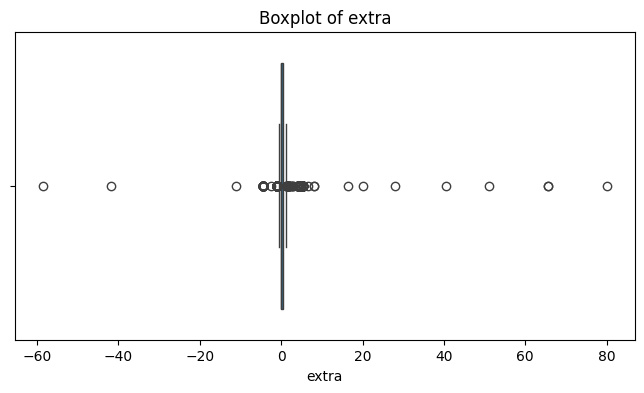

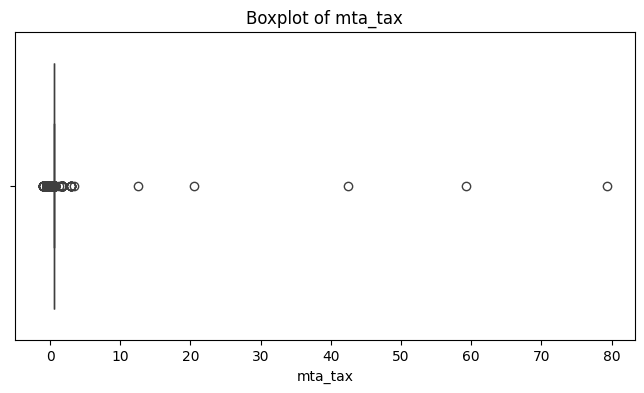

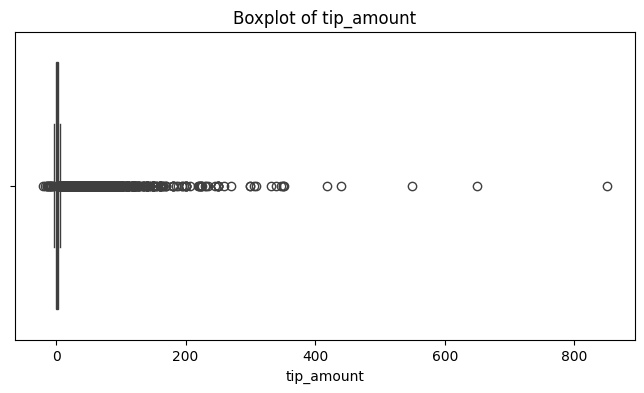

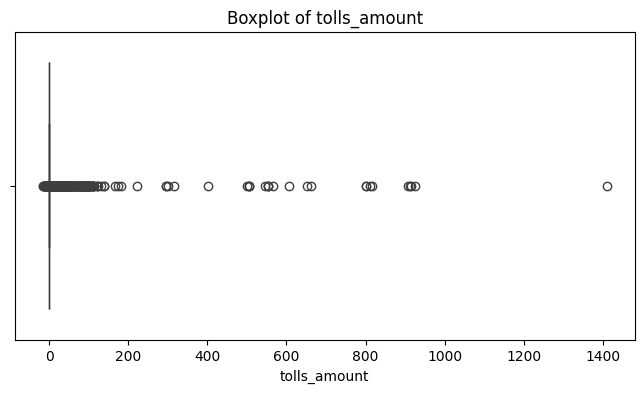

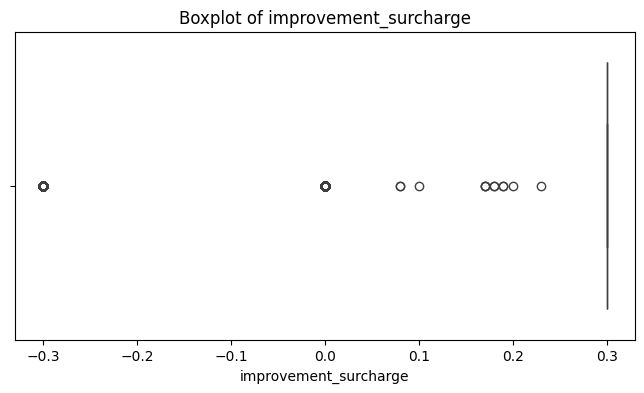

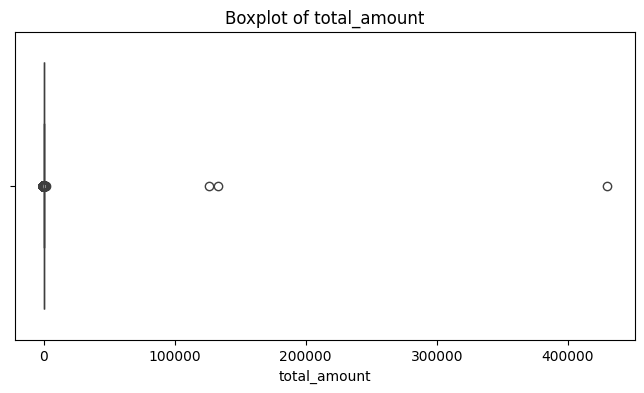

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

Based on the previous graphs, I will classify the columns based on their condition

If distribution is normal -> use Z-Score.


If the distribution is skewed or contains many outliers -> use IQR.


**Z-Score**

Z-score will be used to confirm the presence of outliers and analyze the normal distribution quantitatively and accurately.
Even if the data appears to be regular from the graphs, applying a Z-score provides additional confirmation and enables us to prepare the data for deeper analyses.

**Features:**
Z-Score:

VendorID

IQR:Based on the analyzes below

passenger_count , trip_distance , pickup_longitude , pickup_latitude , RatecodeID , dropoff_longitude , dropoff_latitude , payment_type , fare_amount,extra , mta_tax ,	tip_amount , tolls_amount , improvement_surcharge , total_amount

________________________________________________________________________________

**passenger_count**

Column classification
Based on the Histogram, there is a concentration of values ​​around a certain point without significant deviation, indicating some sort of normal distribution.

From the Boxplot, i notice some outliers.

Based on this, it can be said:

The distribution contains many outliers, so it is preferable to use IQR for this column.
________________________________________________________________________________

**trip_distance**

Column classification
Based on the Histogram, the distribution shows a large skew as the values ​​are mainly concentrated at the beginning of the axis.

From the Boxplot, i notice many outliers.

Based on this:

The distribution is skewed and contains many outliers, so it is preferable to use IQR for this column.
________________________________________________________________________________

**pickup_longitude**

Column classification
Based on the Histogram, i notice that the distribution has a high frequency around a certain value.

From the Boxplot, i notice many outliers.

Based on this:

The distribution contains many outliers, so it is preferable to use IQR for this column.
________________________________________________________________________________

**pickup_latitude**

Column classification
Based on the Histogram, i notice that the distribution has a high frequency around a certain value.

From the Boxplot, i notice many outliers.

Based on this:

The distribution contains many outliers, so it is preferable to use IQR for this column.
________________________________________________________________________________

**RatecodeID**

Column classification
Based on the Histogram, i notice that the distribution has a large concentration of values ​​at zero.

From the Boxplot, i notice a few outliers.

Based on this, it can be said:

The distribution contains outliers, so it is preferable to use IQR for this column.
________________________________________________________________________________

**dropoff_longitude**

Column classification
Based on the Histogram, i notice that there is a large concentration of values ​​around a certain longitude.

From the Boxplot, i notice many outliers.

Based on this:

The distribution contains many outliers, so it is preferable to use IQR for this column.
________________________________________________________________________________

**dropoff_latitude**

Column classification
Based on the Histogram, i notice that the distribution has a large concentration of values ​​around the 40 value.

From the Boxplot, i notice some outliers.

Based on this:

The distribution contains outliers, so it is preferable to use IQR for this column.
________________________________________________________________________________

**payment_type**

Column classification
Based on the Histogram, i notice that the distribution contains a large concentration of values ​​at types 1 and 2.

From the Boxplot, i notice a single outlier at 4.

Based on this, it can be said:

The distribution has limited outliers, however it is preferable to use the IQR for this column to take these outliers into account.
________________________________________________________________________________

**fare_amount**

Column class
Based on the Histogram, i notice that most of the values ​​are close to zero.

From the Boxplot, i notice a number of outliers.

Based on this, it can be said:

The distribution contains many outliers, so it is preferable to use IQR for this column.
________________________________________________________________________________

**extra**

Column classification
Based on the Histogram, i notice a large concentration of values ​​around zero.

From the Boxplot, we notice that there are many outliers on both sides.

Based on this:

The distribution contains many outliers, so it is preferable to use IQR for this column.
________________________________________________________________________________

**mta_tax**

Column classification
Based on the Histogram, i notice that there is a large concentration of values ​​around zero.

From the Boxplot, i notice many outliers.

Based on this:

The distribution contains many outliers, so it is preferable to use IQR for this column.
________________________________________________________________________________

**tip_amount**

Column classification
Based on the Histogram, i notice that most values ​​are centered around zero with a long tail towards larger values.

From Boxplot, i notice a large number of outliers.

Based on this:

The distribution contains many outliers, so it is preferable to use IQR for this column.
________________________________________________________________________________

**tolls_amount**

Column classification
Based on the Histogram, i notice that most of the values ​​are centered around zero.

From the Boxplot, i notice several high outliers.

Based on this:

The distribution contains many outliers, so it is preferable to use IQR for this column.
________________________________________________________________________________

**improvement_surcharge**

Column classification
Based on the Histogram, i notice that there is a large concentration of values ​​around 0.3.

From the Boxplot, i notice some outliers on both sides.

Based on this, it can be said:

The distribution contains outliers, so it is preferable to use IQR for this column.
________________________________________________________________________________
**total_amount**

Column classification
Based on the Histogram, i notice that there is a large concentration of values ​​around zero with a sharp decrease towards higher values.

From the Boxplot, i notice several outliers.

Based on this:

The distribution contains many outliers, so it is preferable to use IQR for this column.

In [7]:
z_score_cols = ["VendorID"] #  For normal columns
iqr_cols = [
    "passenger_count", "trip_distance", "pickup_longitude", "pickup_latitude",
    "RatecodeID", "dropoff_longitude", "dropoff_latitude", "payment_type",
    "fare_amount", "extra", "mta_tax", "tip_amount", "tolls_amount",
    "improvement_surcharge", "total_amount"
] # For skewed columns


print("Columns for Z-Score:", z_score_cols)
print("Columns for IQR:", iqr_cols)

Columns for Z-Score: ['VendorID']
Columns for IQR: ['passenger_count', 'trip_distance', 'pickup_longitude', 'pickup_latitude', 'RatecodeID', 'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount']


In [8]:
import numpy as np
import pandas as pd
from collections import Counter

# Define the Z-Score method function
def z_score_method(df, n, features):

    outlier_list = []  # List to store all detected outlier indices

    for column in features:
        # Calculate mean and standard deviation for the current column
        data_mean = df[column].mean()
        data_std = df[column].std()
        threshold = 3  # Define the Z-Score threshold for outliers

        # Calculate Z-Score for each observation in the column
        z_score = abs((df[column] - data_mean) / data_std)

        # Get indices of rows where Z-Score exceeds the threshold
        outlier_list_column = df[z_score > threshold].index

        # Add these indices to the overall outlier list
        outlier_list.extend(outlier_list_column)

    # Count how many times each index appears in the outlier list
    outlier_list = Counter(outlier_list)

    # Select indices of rows with more than n outliers
    multiple_outliers = [k for k, v in outlier_list.items() if v > n]

    # Print total number of outliers detected
    df_outliers = df.loc[multiple_outliers]
    print("Total number of outliers is:", df_outliers.shape[0])

    return multiple_outliers

# Apply Z-Score method to the "VendorID" column
z_score_cols = ["VendorID"]  # Columns for Z-Score method
outliers_z_score = z_score_method(data, 1, z_score_cols)

# Remove rows identified as outliers and reset the index
df_out_cleaned = data.drop(outliers_z_score, axis=0).reset_index(drop=True)

# View the cleaned dataframe's shape after removing outliers
print(f"Shape of data after removing outliers: {df_out_cleaned.shape}")


Total number of outliers is: 0
Shape of data after removing outliers: (12210952, 19)


In [9]:
import numpy as np
import pandas as pd
from collections import Counter

def IQR_method(df, n, features):
    outlier_list = []

    for column in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column], 75)

        # Interquartile range (IQR)
        IQR = Q3 - Q1

        # Outlier step
        outlier_step = 1.5 * IQR

        # Determining a list of indices of outliers (filtering)
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)].index

        # Appending a list of outliers
        outlier_list.extend(outlier_list_column)

    # Selecting observation containing more than n outliers
    outlier_list = Counter(outlier_list)
    multiple_outliers = [k for k, v in outlier_list.items() if v > n]

    # Calculate the total number of outliers
    df_outliers = df.loc[multiple_outliers]
    print('Total number of outliers is :', df_outliers.shape[0])

    return multiple_outliers

# Applying IQR method to the specified columns
# Detecting outliers
outliers_IQR = IQR_method(data, 1, iqr_cols)

# Dropping outliers and resetting the index
df_out_cleaned_IQR = data.drop(outliers_IQR, axis=0).reset_index(drop=True)

# View the cleaned dataframe's shape after removing outliers
print(f"Shape of data after removing outliers using IQR: {df_out_cleaned_IQR.shape}")


Total number of outliers is : 1637395
Shape of data after removing outliers using IQR: (10573557, 19)


**Task 1:**

Problem: The dataset contains numeric columns with a distribution that could potentially have outliers, skewness, or bias. The presence of these issues could negatively affect any modeling or analysis tasks.

Solution:

I applied two methods for outlier detection:

Z-Score: This method was applied to columns that had a normal distribution. It identifies outliers by calculating the z-score.

IQR (Interquartile Range): This method was applied to columns that had a skewed distribution.

After applying the IQR method, I found that there were 1,637,395 outliers detected in the dataset. The dataset’s shape changed to (10,573,557, 19) after removing these outliers.

Issues Found:

The dataset had a significant number of outliers, especially in skewed numeric columns.
Some of the columns were also showing skewness or had outliers, which could affect the performance of machine learning models and analysis.
Approach to Solve: We handled these issues by:

Using the IQR method to remove outliers for skewed columns.
Dropping rows with identified outliers using the drop() method and resetting the index.


# Feature Engineering
- In Feature engineering we can select features which related to the problem or really have weights to solve
- Now apply technique to more important feature, if its importance very low then drop
- **we call this feature selection -> keep important feature and drop not important features**

In [3]:
import pandas as pd
file_path = "/root/.cache/kagglehub/datasets/elemento/nyc-yellow-taxi-trip-data/versions/2"

df = pd.read_csv(f"{file_path}/yellow_tripdata_2016-03.csv")

# If the goal is to predict the fare amount (fare_amount), the most relevant features might be:
# Feature Selection:
important_features = ['trip_distance','pickup_longitude','pickup_latitude','dropoff_longitude' ,'dropoff_latitude', 'fare_amount', 'tpep_pickup_datetime', 'tpep_dropoff_datetime','tip_amount','total_amount']

df_selected = df[important_features]
print(df_selected.head())


   trip_distance  pickup_longitude  pickup_latitude  dropoff_longitude  \
0           2.50        -73.976746        40.765152         -74.004265   
1           2.90        -73.983482        40.767925         -74.005943   
2          19.98        -73.782021        40.644810         -73.974541   
3          10.78        -73.863419        40.769814         -73.969650   
4          30.43        -73.971741        40.792183         -74.177170   

   dropoff_latitude  fare_amount tpep_pickup_datetime tpep_dropoff_datetime  \
0         40.746128          9.0  2016-03-01 00:00:00   2016-03-01 00:07:55   
1         40.733166         11.0  2016-03-01 00:00:00   2016-03-01 00:11:06   
2         40.675770         54.5  2016-03-01 00:00:00   2016-03-01 00:31:06   
3         40.757767         31.5  2016-03-01 00:00:00   2016-03-01 00:00:00   
4         40.695053         98.0  2016-03-01 00:00:00   2016-03-01 00:00:00   

   tip_amount  total_amount  
0        2.05         12.35  
1        3.05       

In [3]:
# Scaling:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

file_path = "/root/.cache/kagglehub/datasets/elemento/nyc-yellow-taxi-trip-data/versions/2"
df = pd.read_csv(f"{file_path}/yellow_tripdata_2016-03.csv")

important_features = ['trip_distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
                      'dropoff_latitude', 'fare_amount', 'tip_amount', 'total_amount']

# Selecting the important features
df_selected = df[important_features]

# Display initial feature ranges
print("Initial Feature Ranges:\n", df_selected.describe())

# -------------------------
# Min-Max Scaling
# -------------------------
min_max_scaler = MinMaxScaler()
df_min_max_scaled = pd.DataFrame(min_max_scaler.fit_transform(df_selected), columns=df_selected.columns)

print("\nFeature Ranges After Min-Max Scaling:\n", df_min_max_scaled.describe())

# -------------------------
# Standardization (Z-score Scaling)
# -------------------------
z_score_scaler = StandardScaler()
df_z_score_scaled = pd.DataFrame(z_score_scaler.fit_transform(df_selected), columns=df_selected.columns)

print("\nFeature Ranges After Z-Score Scaling:\n", df_z_score_scaled.describe())

# -------------------------
# Robust Scaling
# -------------------------
robust_scaler = RobustScaler()
df_robust_scaled = pd.DataFrame(robust_scaler.fit_transform(df_selected), columns=df_selected.columns)

print("\nFeature Ranges After Robust Scaling:\n", df_robust_scaled.describe())

Initial Feature Ranges:
        trip_distance  pickup_longitude  pickup_latitude  dropoff_longitude  \
count   1.221095e+07      1.221095e+07     1.221095e+07       1.221095e+07   
mean    6.131770e+00     -7.287133e+01     4.014349e+01      -7.293679e+01   
std     6.156483e+03      8.964108e+00     4.937996e+00       8.696974e+00   
min     0.000000e+00     -1.616987e+02     0.000000e+00      -1.616987e+02   
25%     1.000000e+00     -7.399174e+01     4.073630e+01      -7.399125e+01   
50%     1.700000e+00     -7.398161e+01     4.075325e+01      -7.397961e+01   
75%     3.180000e+00     -7.396678e+01     4.076765e+01      -7.396228e+01   
max     1.907263e+07      0.000000e+00     6.685682e+01       0.000000e+00   

       dropoff_latitude   fare_amount    tip_amount  total_amount  
count      1.221095e+07  1.221095e+07  1.221095e+07  1.221095e+07  
mean       4.018050e+01  1.279508e+01  1.792582e+00  1.604582e+01  
std        4.790940e+00  1.340979e+02  2.549124e+00  1.343578e+02  


The transformed values ​​using Min-Max Scaling show that all features are in the range [0, 1].

 Z-Score Scaling
 All features now have a mean close to 0 and a standard deviation close to 1.

 Using Robust Scaling, the impact of outliers is significantly reduced.

# Feature Extraction
- from the columns what a new features we can get as new features?

**hints**
- as example if we have a date column then we can make a new 3 features as [year, month, day]
- if we have length and width then we can make the area as new feature

- depends on this and search, extarct features from the existing ones!

In [4]:
import pandas as pd
import numpy as np

file_path = "/root/.cache/kagglehub/datasets/elemento/nyc-yellow-taxi-trip-data/versions/2"
df = pd.read_csv(f"{file_path}/yellow_tripdata_2016-03.csv")
data = pd.read_csv(f"{file_path}/yellow_tripdata_2016-03.csv")
#1. Extract features from dates
data['pickup_year'] = pd.to_datetime(data['tpep_pickup_datetime']).dt.year
data['pickup_month'] = pd.to_datetime(data['tpep_pickup_datetime']).dt.month
data['pickup_day'] = pd.to_datetime(data['tpep_pickup_datetime']).dt.day
data['pickup_hour'] = pd.to_datetime(data['tpep_pickup_datetime']).dt.hour
data['pickup_minute'] = pd.to_datetime(data['tpep_pickup_datetime']).dt.minute

data['dropoff_year'] = pd.to_datetime(data['tpep_dropoff_datetime']).dt.year
data['dropoff_month'] = pd.to_datetime(data['tpep_dropoff_datetime']).dt.month
data['dropoff_day'] = pd.to_datetime(data['tpep_dropoff_datetime']).dt.day
data['dropoff_hour'] = pd.to_datetime(data['tpep_dropoff_datetime']).dt.hour
data['dropoff_minute'] = pd.to_datetime(data['tpep_dropoff_datetime']).dt.minute

# Calculate the flight duration in minutes
data['trip_duration'] = (
    pd.to_datetime(data['tpep_dropoff_datetime']) -pd.to_datetime(data['tpep_pickup_datetime'])
).dt.total_seconds()/60

# Fare per mile
data['fare_per_mile'] = data['fare_amount'] / data['trip_distance']

print(data.head())


   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2016-03-01 00:00:00   2016-03-01 00:07:55                1   
1         1  2016-03-01 00:00:00   2016-03-01 00:11:06                1   
2         2  2016-03-01 00:00:00   2016-03-01 00:31:06                2   
3         2  2016-03-01 00:00:00   2016-03-01 00:00:00                3   
4         2  2016-03-01 00:00:00   2016-03-01 00:00:00                5   

   trip_distance  pickup_longitude  pickup_latitude  RatecodeID  \
0           2.50        -73.976746        40.765152           1   
1           2.90        -73.983482        40.767925           1   
2          19.98        -73.782021        40.644810           1   
3          10.78        -73.863419        40.769814           1   
4          30.43        -73.971741        40.792183           3   

  store_and_fwd_flag  dropoff_longitude  ...  pickup_day  pickup_hour  \
0                  N         -74.004265  ...           1            0   
